- Task: Customer churn prediction in a telecom company - classification task
- Model: Artificial Neural Net
- Data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- Use: Reproducable by any organization to understand thheir customer behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/deep learning/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Inital data Exploration**

In [3]:
df.shape

(7043, 21)

In [4]:
df.info() # Show the data dypes of columns and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# grouping different data types together

df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [6]:
df.isna().sum().any() # No null values 

False

In [7]:
df.duplicated().any() # No duplicate record identified

False

Analyzing different features:-

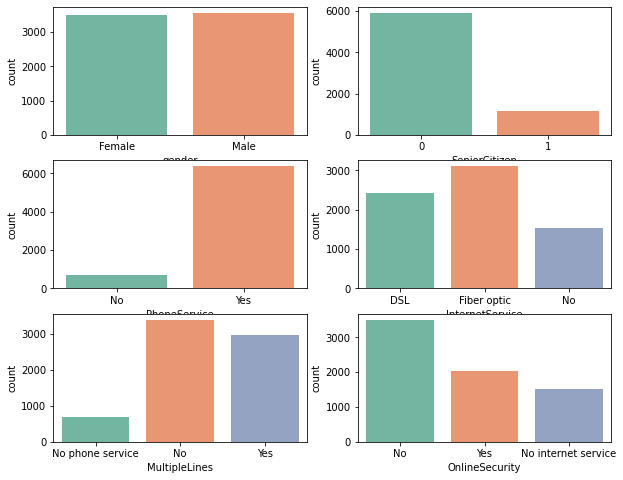

In [8]:
plt.figure(figsize=(10,8))
plt.rcParams["figure.autolayout"] = True

plt.subplot(3,2,1)
sns.countplot(data=df,x='gender', palette = 'Set2')


plt.subplot(3,2,2)
sns.countplot(data=df,x='SeniorCitizen', palette = 'Set2')

plt.subplot(3,2,3)
sns.countplot(data=df,x='PhoneService', palette = 'Set2')

plt.subplot(3,2,4)
sns.countplot(data=df,x='InternetService', palette = 'Set2')

plt.subplot(3,2,5)
sns.countplot(data=df,x='MultipleLines',palette = 'Set2')

plt.subplot(3,2,6)
sns.countplot(data=df,x='OnlineSecurity', palette = 'Set2')

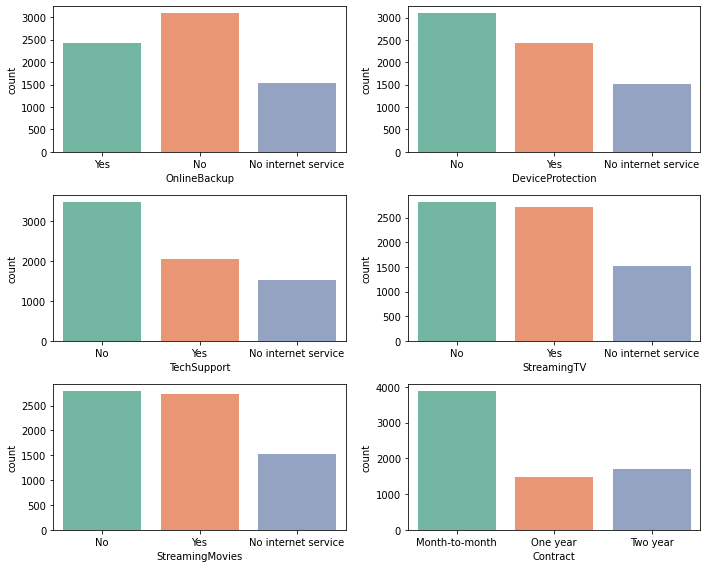

In [9]:
plt.figure(figsize=(10,8))
plt.rcParams["figure.autolayout"] = True

plt.subplot(3,2,1)
sns.countplot(data=df,x='OnlineBackup', palette = 'Set2')


plt.subplot(3,2,2)
sns.countplot(data=df,x='DeviceProtection', palette = 'Set2')

plt.subplot(3,2,3)
sns.countplot(data=df,x='TechSupport', palette = 'Set2')

plt.subplot(3,2,4)
sns.countplot(data=df,x='StreamingTV', palette = 'Set2')

plt.subplot(3,2,5)
sns.countplot(data=df,x='StreamingMovies',palette = 'Set2')

plt.subplot(3,2,6)
sns.countplot(data=df,x='Contract', palette = 'Set2')

plt.show()

In [10]:
# 1) Senior citizen

df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

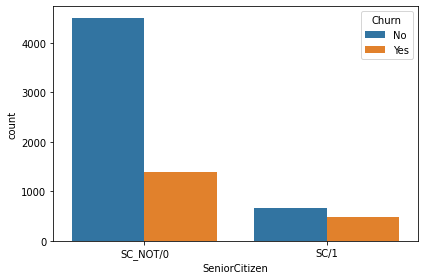

In [11]:
x_val = ['SC_NOT/0','SC/1']
g = sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
g.set_xticklabels(x_val)
plt.show()

It can be understood from the plot and values that the chances of senior people leaving the company are higher than non SC people.

In [12]:
# 2) gender

df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

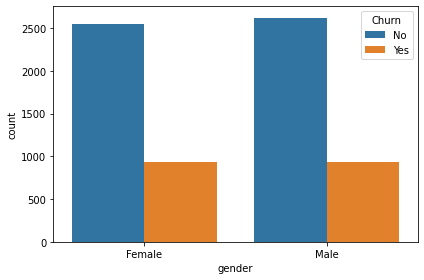

In [13]:
sns.countplot(data=df,x='gender',hue='Churn')
plt.show()

In the data the proportion of male and female customer are balanced. Their probabaility of leaving the company is also same.

In [14]:
# 3) Partnership

df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

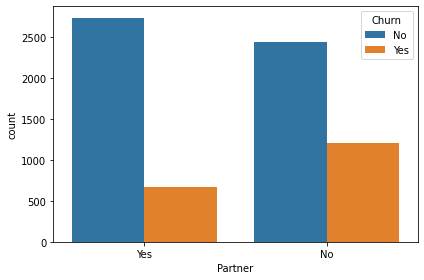

In [15]:
sns.countplot(data=df,x='Partner',hue='Churn')
plt.show()

the probability of customer who are not partners with this company are more likely to leave it than the people who are in a partnership.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


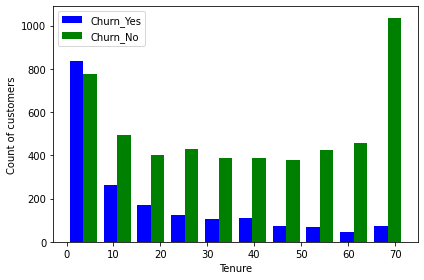

In [16]:
# Tenure of availing the service

# sns.histplot(data=df,x='tenure',bins=10,hue='Churn')
# plt.ylabel('Count of customers left vs stayed')
# plt.show()

df_tenure_yes = df[df['Churn'] == 'Yes']['tenure']
df_tenure_no = df[df['Churn'] == 'No']['tenure']
plt.hist([df_tenure_yes,df_tenure_no],label=['Churn_Yes','Churn_No'],color=['blue','green'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Count of customers')
plt.show()

This plot shows the tenure of customers who stayed and left the company.
Mostly people who are with more months, do not tend to leave and people who left are around 1-10 months.

In [17]:
# Contractual relation

df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

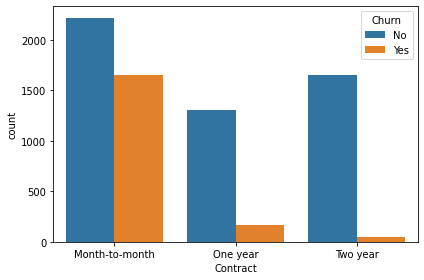

In [18]:
sns.countplot(data=df,x='Contract',hue='Churn')
plt.show()

It shows customers who pays bill month to month basis are the highest to leave and the ones whose contract are for two years are least to leave.

Churn  MonthlyCharges
No     20.05             58
       19.70             41
       19.95             41
       19.85             40
       19.90             40
                         ..
Yes    115.65             1
       116.20             1
       117.45             1
       117.80             1
       118.35             1
Name: MonthlyCharges, Length: 2370, dtype: int64


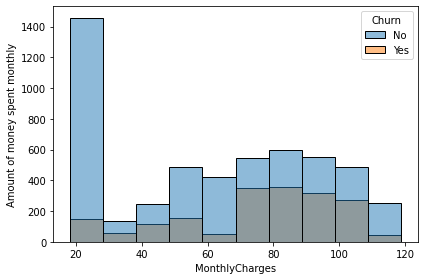

In [19]:
# Monthly charges paid by the customer

print(df.groupby('Churn')['MonthlyCharges'].value_counts())

sns.histplot(data=df,x='MonthlyCharges',bins=10,hue='Churn')
plt.ylabel('Amount of money spent monthly')
plt.show()

We can see that most of the customers stayed who paied around 20 per month. Also people who left had to pay around 70-90 per month.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


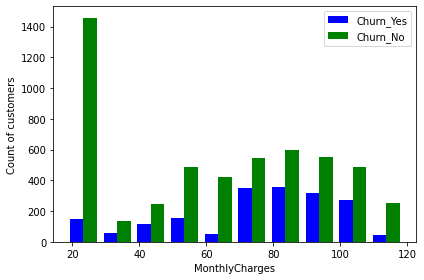

In [20]:
df_mc_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
df_mc_no = df[df['Churn'] == 'No']['MonthlyCharges']
plt.hist([df_mc_yes,df_mc_no],label=['Churn_Yes','Churn_No'],color=['blue','green'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('Count of customers')
plt.show()

Bivariate Analysis together:-

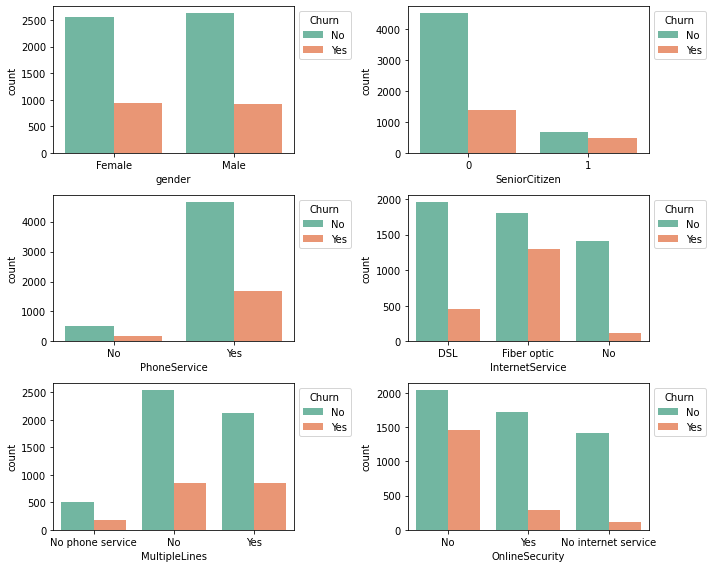

In [21]:
plt.figure(figsize=(10,8))
plt.rcParams["figure.autolayout"] = True

plt.subplot(3,2,1)
sns.move_legend(sns.countplot(data=df,x='gender',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))


plt.subplot(3,2,2)
sns.move_legend(sns.countplot(data=df,x='SeniorCitizen',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

plt.subplot(3,2,3)
sns.move_legend(sns.countplot(data=df,x='PhoneService',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

plt.subplot(3,2,4)
sns.move_legend(sns.countplot(data=df,x='InternetService',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

plt.subplot(3,2,5)
sns.move_legend(sns.countplot(data=df,x='MultipleLines',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

plt.subplot(3,2,6)
sns.move_legend(sns.countplot(data=df,x='OnlineSecurity',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

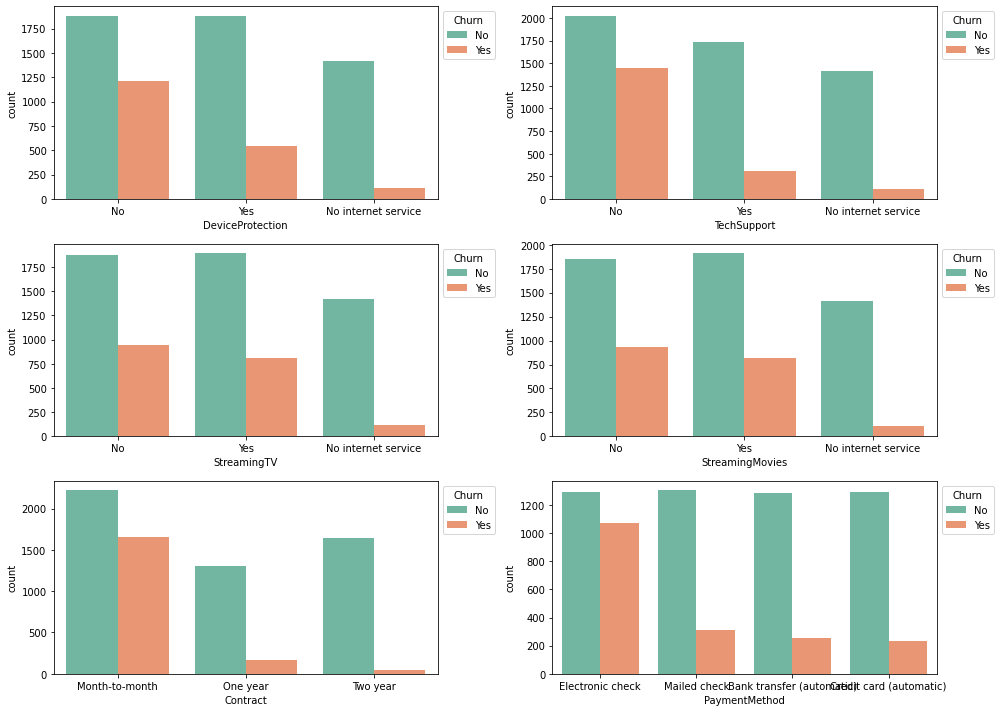

In [22]:
plt.figure(figsize=(14,10))
plt.rcParams["figure.autolayout"] = True

plt.subplot(3,2,1)
sns.move_legend(sns.countplot(data=df,x='DeviceProtection',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))


plt.subplot(3,2,2)
sns.move_legend(sns.countplot(data=df,x='TechSupport',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

plt.subplot(3,2,3)
sns.move_legend(sns.countplot(data=df,x='StreamingTV',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

plt.subplot(3,2,4)
sns.move_legend(sns.countplot(data=df,x='StreamingMovies',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

plt.subplot(3,2,5)
sns.move_legend(sns.countplot(data=df,x='Contract',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

plt.subplot(3,2,6)
sns.move_legend(sns.countplot(data=df,x='PaymentMethod',hue='Churn', palette = 'Set2'), "upper left", bbox_to_anchor=(1, 1))

<Figure size 720x432 with 0 Axes>

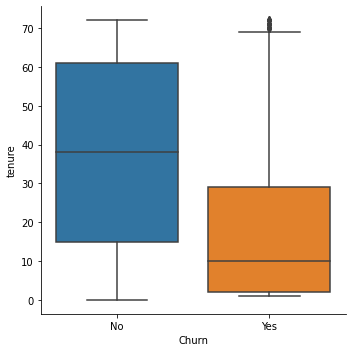

In [23]:
plt.figure(figsize=(10,6))
sns.catplot(x = 'Churn', y="tenure", kind="box", data = df)
plt.show()

People tend to leave at less tenure more than longer tenure

<Figure size 720x432 with 0 Axes>

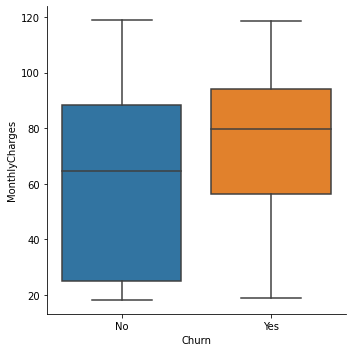

In [24]:
plt.figure(figsize=(10,6))
sns.catplot(x = 'Churn', y="MonthlyCharges", kind="box", data = df)

people who pay more monthly charges are more likely to leave than people who pay less.

**Feature Engineering:-**

In [25]:
# First dropping the irrelevant id column from the dataset

df = df.drop('customerID',axis=1)

In [26]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [27]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

We see the TotalCharges column is object type whereas the monthlycharges column is float which is more meaningful.

In [28]:
# TotalCharges column analysis and convert to float

df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce', downcast="float")
df.TotalCharges = df.TotalCharges.astype(np.float64).round(2)
print(df.TotalCharges.dtype)
print(df.TotalCharges.values)




float64
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [29]:
# Checking if any value is null in the total charges column as an error occured during conversion

df.TotalCharges.isnull().any() #returns true
df[df.TotalCharges.isnull()] # returns the rows containing null in TC column
df[~df.TotalCharges.isnull()] # returns the rows containing not null in TC column

# dropping those rows as the number is very short compared to data size

df1 = df[df['TotalCharges'].notna()]
print(df1.shape)

# check if anymore null is present

df1.TotalCharges.isnull().any() # returns false



(7032, 20)


False

In [30]:
print(df1.sort_values('TotalCharges',ascending=False)['TotalCharges'])
df1.groupby('Churn')['TotalCharges'].value_counts()

4610    8684.80
4586    8672.45
6768    8670.10
5347    8594.40
2187    8564.75
         ...   
583       19.00
4939      18.90
1151      18.85
6489      18.85
1654      18.80
Name: TotalCharges, Length: 7032, dtype: float64


Churn  TotalCharges
No     19.75           7
       19.55           6
       19.65           6
       20.05           6
       20.20           5
                      ..
Yes    7856.00         1
       7968.85         1
       8109.80         1
       8127.60         1
       8684.80         1
Name: TotalCharges, Length: 6697, dtype: int64

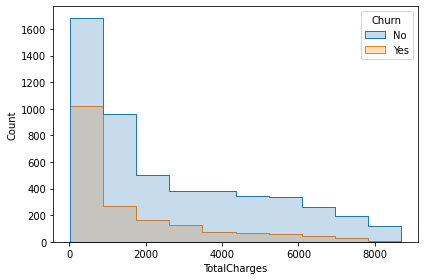

In [31]:
# analyzing the TotalCharges column

sns.histplot(data=df,x='TotalCharges',hue="Churn", element="step",bins=10)
plt.show()

<Figure size 720x432 with 0 Axes>

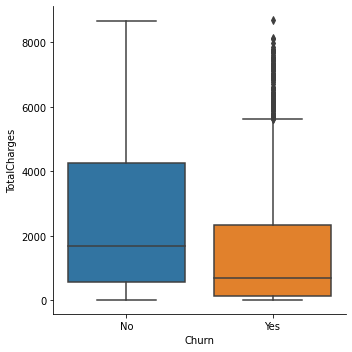

In [32]:
plt.figure(figsize=(10,6))
sns.catplot(x = 'Churn', y="TotalCharges", kind="box", data = df)

people tend to leave more who pay around 1000 total charges

In [33]:
def get_values(df): # helper function the unique values for all columns for further processing
  for col in df:
    if df[col].dtype == 'object':
      print(f'{col} : {df[col].unique()}')

In [34]:
get_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [35]:
# Replace 'No..... Service' with 'No'

df1 = df1.replace('No internet service','No')
df1 = df1.replace('No phone service','No')

In [36]:
get_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [47]:
# label encoding on different columns

from sklearn import preprocessing

col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
       'StreamingMovies','PaperlessBilling']
le = preprocessing.LabelEncoder()
df1[col] = df1[col].apply(le.fit_transform)
df1['Churn'] = df1['Churn'].replace({'Yes':1,'No':0})
df1['gender'] = df1['gender'].replace({'Female':1,'Male':0})

In [56]:
# Checking the label encoding

for col in df1.columns:
  print(f'{col} : {df1[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [64]:
# one hot encoding on the other categorical columns

from sklearn.preprocessing import OneHotEncoder
ohe_col = ['InternetService','Contract','PaymentMethod']
ohe = OneHotEncoder()
ohe.fit(df1[ohe_col])
encoded_col = ohe.get_feature_names_out(ohe_col) # to get the names of ohe columns
df1[encoded_col] = ohe.transform(df1[ohe_col]).toarray()

In [68]:
# dropping the old categorical columns

df1 = df1.drop(ohe_col,axis=1)

In [72]:
df1.info() # all have been converted to numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [74]:
# Data scaling of numericalcolumns to scale between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scale_col = ['tenure','MonthlyCharges','TotalCharges']
sc = MinMaxScaler()
df1[scale_col] = sc.fit_transform(df1[scale_col])

In [80]:
# check the conversion

for col in df1.columns: 
  print(f'{col} : {df1[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [86]:
# data spliiting

from sklearn.model_selection import train_test_split
y = df1['Churn']
x = df1.drop('Churn', axis=1)
print(f'Shape of the data set before splitting is {x.shape},{y.shape}')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(f'Shape of the data set after splitting is {X_train.shape},{y_train.shape},{X_test.shape},{y_test.shape}')

Shape of the data set before splitting is (7032, 26),(7032,)
Shape of the data set after splitting is (4711, 26),(4711,),(2321, 26),(2321,)


In [98]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential()
model.add(keras.layers.Dense(26,input_shape=(26,),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(15,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
148/148 [==============================] - 2s 2ms/step - loss: 0.5355 - accuracy: 0.7164
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7773
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7850
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7932
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7937
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7935
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7998
Epoch 8/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8015
Epoch 9/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.7988
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4214 - accura

In [99]:
# Evaluate on test set

acc_test = model.evaluate(X_test,y_test)
print(f'The test accuracy we got is,{acc_test}')


73/73 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7962
The test accuracy we got is,[0.4450751841068268, 0.7962085604667664]


In [121]:
# Prediction by the model on test set

pred = model.predict(X_test,verbose=0)
pred_list = [0 if i<.5 else 1 for i in pred]
# print(pred_list)
compare = pd.DataFrame({'Ground_Truth':y_test,'Prediction':pred_list})
compare = compare.reset_index(drop=True)
compare.head(10)

,Ground_Truth,Prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


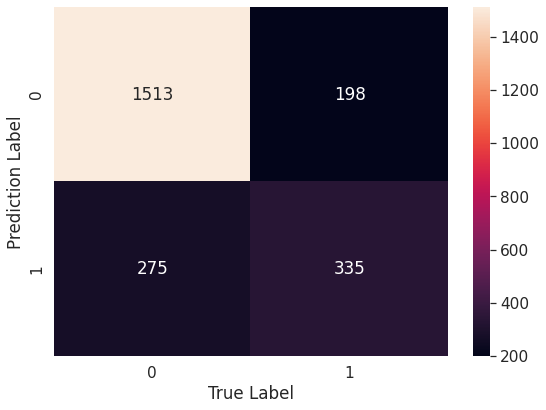

In [126]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(compare.Ground_Truth,compare.Prediction)
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm, annot=True,fmt='d')
ax.set(xlabel='True Label', ylabel='Prediction Label')
plt.show()

In [130]:
from sklearn.metrics import classification_report

print(classification_report(compare.Ground_Truth,compare.Prediction))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1711
           1       0.63      0.55      0.59       610

    accuracy                           0.80      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.79      0.80      0.79      2321

